In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import pandas as pd
import numpy as np
import os
import librosa 
import tensorflow as tf
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import tensorflow.keras.layers as layers
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

In [3]:
!unzip "/content/gdrive/MyDrive/ml/CatDogAudioClassification/cats_dogs.zip"

Archive:  /content/gdrive/MyDrive/ml/CatDogAudioClassification/cats_dogs.zip
   creating: test/
   creating: test/test/
  inflating: test/test/dog_barking_112.wav  
  inflating: test/test/dog_barking_99.wav  
  inflating: test/test/dog_barking_91.wav  
  inflating: test/test/dog_barking_90.wav  
  inflating: test/test/dog_barking_89.wav  
  inflating: test/test/dog_barking_82.wav  
  inflating: test/test/dog_barking_78.wav  
  inflating: test/test/dog_barking_73.wav  
  inflating: test/test/dog_barking_66.wav  
  inflating: test/test/dog_barking_64.wav  
  inflating: test/test/dog_barking_62.wav  
  inflating: test/test/dog_barking_59.wav  
  inflating: test/test/dog_barking_54.wav  
  inflating: test/test/dog_barking_49.wav  
  inflating: test/test/dog_barking_48.wav  
  inflating: test/test/dog_barking_46.wav  
  inflating: test/test/dog_barking_45.wav  
  inflating: test/test/dog_barking_44.wav  
  inflating: test/test/dog_barking_43.wav  
  inflating: test/test/dog_barking_34.wav  

In [4]:
#train data creator

ID=[]
label=[]
# import required module
import os
# assign directory
directory = '/content/train/'
 
# iterate over files in
# that directory

for folder in os.listdir(directory):                               #go into the directory
    for filename in os.listdir(directory+str(folder)):          #go in every class 
        f = os.path.join(directory+str(folder), filename)    #scan through every file in that class
        if os.path.isfile(f):
            ID.append(f.split('/')[-1])
            label.append(f.split('/')[-2])

In [5]:
train_data=pd.DataFrame()
train_data['ID']=ID
train_data['label']=label

In [6]:
train_data

,ID,label
0,dog_barking_5.wav,dog
1,dog_barking_102.wav,dog
2,dog_barking_56.wav,dog
3,dog_barking_87.wav,dog
4,dog_barking_20.wav,dog
...,...,...
205,cat_6.wav,cat
206,cat_5.wav,cat
207,cat_97.wav,cat
208,cat_77.wav,cat


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


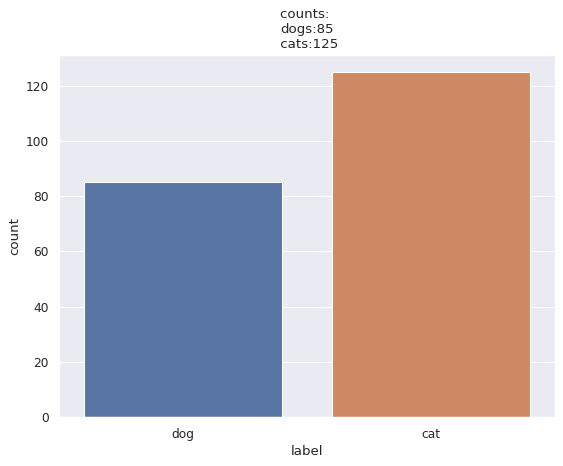

In [7]:
plt.figure(figsize=(8,6),dpi=80)
sns.set_theme(style="darkgrid")
sns.countplot('label',data=train_data)
plt.title('counts: \n' +'dogs:'+str(train_data.label.value_counts()[1])+
          '\n cats:'+str(train_data.label.value_counts()[0]))
plt.show()

In [8]:
ID=[]
label=[]
# import required module
import os
# assign directory
directory = '/content/test/'
 
# iterate over files in
# that directory

for folder in os.listdir(directory):
    for filename in os.listdir(directory+str(folder)):
        f = os.path.join(directory+str(folder), filename)
        if os.path.isfile(f):
            ID.append(f.split('/')[-1])
            label.append(f.split('/')[-2])

In [9]:
label[:10]

['cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats']

In [10]:
for i in range(len(label)):
    if(label[i]=='test'):
        label[i]='dogs'

label[:10]

['cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats']

In [11]:
test_data=pd.DataFrame()
test_data['ID']=ID
test_data['label']=label
test_data

,ID,label
0,cat_144.wav,cats
1,cat_75.wav,cats
2,cat_158.wav,cats
3,cat_42.wav,cats
4,cat_85.wav,cats
...,...,...
62,dog_barking_19.wav,dogs
63,dog_barking_66.wav,dogs
64,dog_barking_15.wav,dogs
65,dog_barking_73.wav,dogs


# Feature extraction of audio files using MFCCs
This function will access the audio files directly from the dataset and automatically store the features for each file in train set
In librosa.load function if we dont write sr=None, it will upsample every audio file to 22Khz which we dont want here.
I have used 100 Mel freq cepstrum coeff. for each audio file.

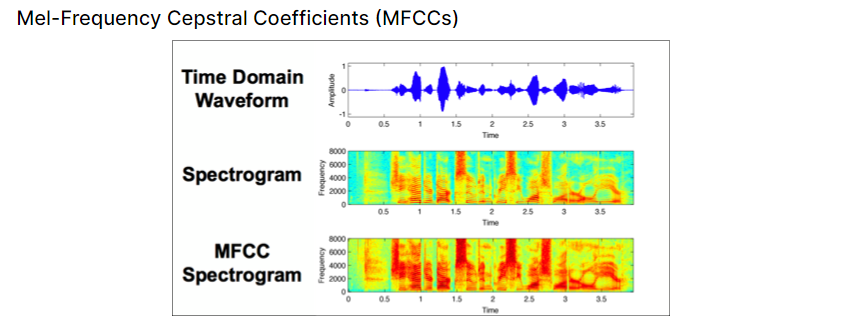

In [12]:
def extract_features(directory):
    features=[]
    ID=[]
    for folder in os.listdir(directory):
        for filename in os.listdir(directory+str(folder)):
            f = os.path.join(directory+str(folder), filename)
            if os.path.isfile(f):
                x,sr=librosa.load(f, res_type='kaiser_fast',sr=None)
                mfccs=np.mean(librosa.feature.mfcc(x,sr=sr,n_mfcc=100).T,axis=0)
                features.append(mfccs)
                ID.append(f.split('/')[-1])
    return [ID, features]

In [13]:
# call on train data set
ID, features_train=extract_features('/content/train/')

In [14]:
#checking that if they are same, there should be no zero or false value

print(np.count_nonzero(train_data.ID==ID) )

#the ablove thing should be equal to the original shape of ID's in train_data

len(train_data.ID)==np.count_nonzero(train_data.ID==ID) 

210


True

In [15]:
# call on test data
ID,features_test=extract_features('/content/test/')

len(test_data.ID)==np.count_nonzero(test_data.ID==ID)   #matched 

True

In [16]:
X_train=np.array(features_train)
X_test=np.array(features_test)

Y_train=train_data.label
Y_test=test_data.label

In [17]:
#label encode Y_train and Y_test

le=LabelEncoder()

temp=le.fit_transform(Y_train)
Y_train=temp.reshape(-1,1)

temp=le.fit_transform(Y_test)
Y_test=temp.reshape(-1,1)

In [29]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)   

(210, 100) (67, 100)
(210, 1) (67, 1)
[-4.28106689e+02  1.48950815e+01 -3.15212421e+01 -6.80621862e+00
 -1.37228069e+01 -1.66699657e+01 -6.25681520e-01 -6.44781876e+00
  3.00821567e+00 -6.90955925e+00  1.30397546e+00 -1.04357648e+00
 -4.51090956e+00 -3.54451947e-02 -5.55784178e+00 -3.13983035e+00
 -6.31933022e+00 -1.15695870e+00 -1.89611971e+00 -1.81703579e+00
 -2.69565511e+00 -1.85053039e+00 -1.90609682e+00 -5.36261976e-01
 -1.91837788e+00 -1.03510356e+00 -1.80478239e+00 -8.12635958e-01
 -5.17968714e-01 -1.37183237e+00 -7.84925163e-01 -8.34227920e-01
  1.00635076e+00  7.64571607e-01  7.43897736e-01  4.37216580e-01
 -1.34415299e-01  8.15364778e-01 -7.65259683e-01 -5.35317659e-01
 -1.12852836e+00 -7.57635057e-01  4.64575410e-01  2.92852074e-01
  1.03615308e+00 -3.73113781e-01  1.11154306e+00 -2.91661173e-01
 -6.73085868e-01 -3.85634452e-01  7.04103529e-01  6.04860902e-01
 -3.67187172e-01 -3.88632208e-01 -1.10972488e+00  3.25349808e-01
 -1.23190963e+00 -4.97705489e-01 -6.56955361e-01  5.

# Build audio classification model
input shape will be 100 since there are 100 mfccs for each audio file

In [20]:
model=tf.keras.Sequential()
model.add(layers.Dense(input_shape=(100,), units= 200,activation='relu'))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 200)               20200     
                                                                 
 dense_5 (Dense)             (None, 200)               40200     
                                                                 
 dense_6 (Dense)             (None, 200)               40200     
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 100,801
Trainable params: 100,801
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
hist=model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 3ms/step - loss: 4.1203 - accuracy: 0.6000
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 1.6115 - accuracy: 0.6952
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8482 - accuracy: 0.8667
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5502 - accuracy: 0.8381
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4165 - accuracy: 0.8619
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3538 - accuracy: 0.8857
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3132 - accuracy: 0.8857
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2603 - accuracy: 0.9095
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1758 - accuracy: 0.9286
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1241 - accuracy: 0.9524
Epoch 11/100
7/7 [===========

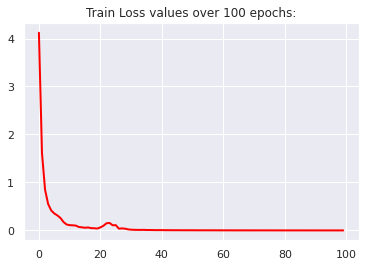

In [23]:
plt.title('Train Loss values over 100 epochs:')
plt.plot(hist.history['loss'],color='red',linewidth=2)
plt.show()

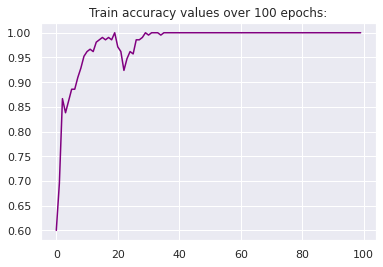

In [24]:
plt.title('Train accuracy values over 100 epochs:')
plt.plot(hist.history['accuracy'],color='purple')
plt.show()

# Testing the model with test data and metrics

3/3 [==============================] - 0s 2ms/step


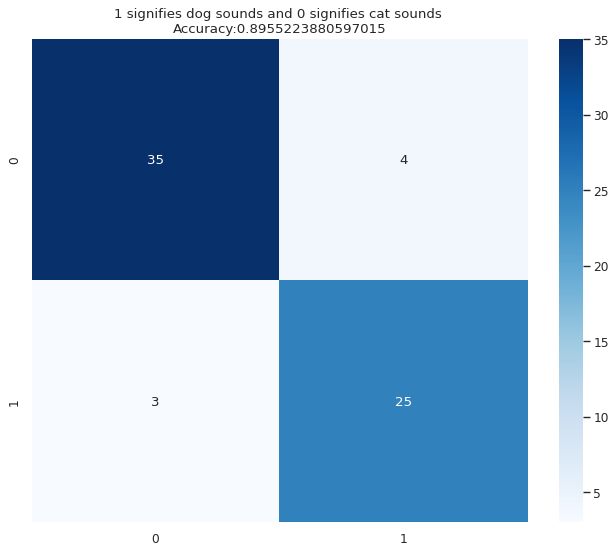

In [25]:
Y_pred=model.predict(X_test)
#since we are using sigmoid activation function at the output layer
Y_pred=(Y_pred>0.5)*1

plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cmap='Blues')
plt.title('1 signifies dog sounds and 0 signifies cat sounds \n'+'Accuracy:'+str(accuracy_score(Y_test,Y_pred)))
plt.show()

# Full classification report

In [26]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        39
           1       0.86      0.89      0.88        28

    accuracy                           0.90        67
   macro avg       0.89      0.90      0.89        67
weighted avg       0.90      0.90      0.90        67

